# Exercício SVM 2

In [130]:
# Imports Necessários
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [91]:
# Funções Suporte 

def plot_regions(model, X, y, legend):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt


    # Plot Decision Region using mlxtend's awesome plotting function
    plot_decision_regions(X=X.values, 
                          y=y.values,
                          clf=model, 
                          legend=legend,
                          markers='o',
                          colors='red,blue')

    # Update plot object with X/Y axis labels and Figure Title
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title('SVM Decision Region Boundary', size=16)

## Atividade 1 

Analise os dados a seguir e responda o que se pede.

In [92]:
data = pd.read_csv("../datasets/banana_dataset/banana_data.csv", header=None, names=['Class','A','B'])
data.head()

,Class,A,B
0,0.0,-3.089839,-0.831686
1,0.0,-2.980834,-0.159575
2,0.0,-2.836057,-0.177081
3,0.0,-2.767849,0.096217
4,0.0,-2.600350,0.216772


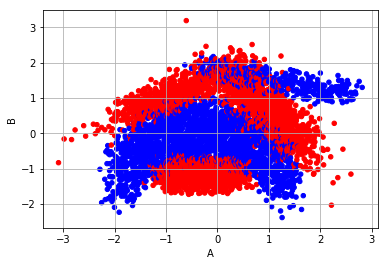

In [93]:
colors = {0:'red', 1:'blue'}
data.plot(kind='scatter', x='A', y='B',c=data['Class'].apply(lambda x: colors[x]),grid=True) 

**a)** Analisando os dados plotados no gráfico anterior, o que você pode concluir sobre a linearidade dos dados. 

**Insira sua resposta neste espaço**

**b)** Comprove o que você analisou sobre os dados executando diferentes tipos de kernel SVM para escolher o que melhor classifica os dados. Para os testes, siga o `pipeline` a seguir:

    1. Divida os dados em treino e teste. Sendo que os testes devem conter 20% dos dados originais. 
    2. Aplique a validação cruzada de 5 folds na base de treino e escolha o melhor modelo.
    3. Aplique o melhor modelo na base de teste e reporte a acurácia do mesmo.

In [98]:
X = data[['A','B']]
y = data['Class'].astype(np.integer)
         
# Put your code here

**c)** Use a função `plot_regions` para plotar o melhor modelo construído juntamente com a base de teste. Analise o gráfico gerado. `No códico a seguir, substitua a variável modelo pelo melhor modelo treinado.`

In [ ]:
plot_regions(modelo, X_test, y_test, 0)

## Atividade 2 

A base a seguir consiste de uma base análise de sentimento. As próximas linhas fazem o pré-processmento da base e gera as entradas para o modelo que será treinado.


In [126]:
data_train = pd.read_csv("../datasets/sentiment/CR.train", sep="\t", header=None, names=['Text', 'Sentiment'])
data_test = pd.read_csv("../datasets/sentiment/CR.dev", sep="\t", header=None, names=['Text', 'Sentiment'])

In [124]:
data_train.head()

,Text,Sentiment
0,"2 . take around 10,000 640x480 pictures .",1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music files are uns...,0
4,i was using the cheapie pail ... and it worked...,1


In [127]:
data_test.head()

,Text,Sentiment
0,"also , the carrying case that came with mine c...",0
1,"ability to play most discs - i tried dvd , vcd...",1
2,"downside is the size of the phone , it is big ...",0
3,even leaving it on the default setting ( witho...,1
4,"as one other reviewer pointed out , it does oc...",0


In [132]:
texts_train = data_train['Text']
labels_train = data_train['Sentiment']
labels_train = np.array(labels_train)

texts_test = data_test['Text']
labels_test = data_test['Sentiment']
labels_test = np.array(labels_test)

Quando estamos trabalhando com textos, os atributos são as palavras que compõe aquele conjunto de textos. Teoricamente, a quantidade de colunas é igual a quantidade de palavras na base. No entanto, esse número pode ser muito alto e nem sempre todas as palavras são relevantes. Sendo assim, podemos controlar essa quantidade a partir doa parâmetro `max_features` no método a seguir:

In [248]:
count_vector = TfidfVectorizer(max_features=None, ngram_range=(1,3), analyzer='word', binary=False)
X_train = count_vector.fit_transform(texts_train)
X_test = count_vector.transform(texts_test)

Com isso, sua base é composta por:

* `X_train`: features da base de treinamento
* `labels_train`: labels da base de treinamento
* `X_test`: features da base de teste
* `labels_train`: labels da base de teste

Sabendo destas informações, responda o que se pede:

1. Construa um modelo SVM que permita classificar os textos. 
2. Para a escolha do melhor modelo, utilize validação cruzada de 5 folds na base de treinamento. 
3. O melhor modelo deve ser testado na base de testes.
4. Varie o parâmetro `max_features` e avalie o seu impacto na acurácia do melhor modelo. 

In [ ]:
#Put your code here